## Introvert vs Extrovert Classification EDA

### 🧠 EDA on Extrovert vs Introvert Behavior Dataset

#### 📌 1. Project Introduction

- The goal of this project is to analyze behavioral traits of individuals to classify whether a person is an **Introvert** or **Extrovert**.
- The dataset contains self-reported behavioral patterns such as social event attendance, time spent alone, and social media usage.
- This analysis will help us uncover patterns and correlations between social behavior and personality type.

#### 📋 2. Dataset Features Description

| Feature Name              | Description                                                                 |
|---------------------------|-----------------------------------------------------------------------------|
| `Time_spent_Alone`        | Number of hours an individual spends alone daily                           |
| `Stage_fear`              | Whether the person experiences stage fright (Yes/No)                        |
| `Social_event_attendance`| Frequency of attending social gatherings and events                         |
| `Going_outside`           | How often the individual goes outside (frequency)                          |
| `Drained_after_socializing`| Whether the person feels mentally drained after social interactions (Yes/No) |
| `Friends_circle_size`     | Approximate number of close friends or social connections                  |
| `Post_frequency`          | Frequency of posting on social media platforms                             |
| `Personality`             | Target variable: Labels individual as either an Introvert or Extrovert     |


#### 🎯 3. Problem Statement

The objective of this project is to explore and analyze individual behavioral traits using the given dataset and build a machine learning model that can accurately classify a person as an **Introvert** or **Extrovert**. The classification can assist in personality prediction, customized content delivery, or even team compatibility assessments.

### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

### Load, Explore and Clean Dataset

In [2]:
df = pd.read_csv("data/personality_dataset.csv")
df.head()   # First Five Records of Dataframe

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [3]:
df.tail()   # Last Five Records of Dataframe

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,3.0,Yes,2.0,0.0,Introvert
2899,3.0,No,6.0,6.0,No,6.0,9.0,Extrovert


In [4]:
# Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [5]:
# Dataframe statistics
df.describe(include='all')

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,2900.000000,2900,2900.000000,2900.000000,2900,2900.000000,2900.000000,2900
unique,NaN,2,NaN,NaN,2,NaN,NaN,2
top,NaN,No,NaN,NaN,No,NaN,NaN,Extrovert
freq,NaN,1490,NaN,NaN,1493,NaN,NaN,1491
mean,4.505816,NaN,3.963354,3.000000,NaN,6.268863,3.564727,NaN
std,3.441180,NaN,2.872608,2.221597,NaN,4.232340,2.893587,NaN
min,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN
25%,2.000000,NaN,2.000000,1.000000,NaN,3.000000,1.000000,NaN
50%,4.000000,NaN,3.963354,3.000000,NaN,5.000000,3.000000,NaN
75%,7.000000,NaN,6.000000,5.000000,NaN,10.000000,6.000000,NaN


In [6]:
# Checking for missing values
df.isna().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [7]:
# Checking for duplicates
df.duplicated().sum()

np.int64(402)

Here, we are able to find out that our dataset have 402 duplicates values from total 2900 records. 

In [8]:
# Drop duplicate values
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [9]:
# Now, lets check the dataset infomation
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2498 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2498 non-null   float64
 1   Stage_fear                 2498 non-null   object 
 2   Social_event_attendance    2498 non-null   float64
 3   Going_outside              2498 non-null   float64
 4   Drained_after_socializing  2498 non-null   object 
 5   Friends_circle_size        2498 non-null   float64
 6   Post_frequency             2498 non-null   float64
 7   Personality                2498 non-null   object 
dtypes: float64(5), object(3)
memory usage: 175.6+ KB


In [10]:
# Number of categorical and numerical features
num_categorical = len(df.select_dtypes(include=['object']).columns)
num_numerical = len(df.select_dtypes(include=['number']).columns)

print(f"Number of categorical features: {num_categorical}")
print(f"Features: {df.select_dtypes(include=['object']).columns.tolist()}")
print('\n')
print(f"Number of numerical features: {num_numerical}")
print(f"Features: {df.select_dtypes(include=['number']).columns.tolist()}")

Number of categorical features: 3
Features: ['Stage_fear', 'Drained_after_socializing', 'Personality']


Number of numerical features: 5
Features: ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']


In [11]:
df.describe(include='all')

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,2498.000000,2498,2498.000000,2498.000000,2498,2498.000000,2498.000000,2498
unique,NaN,2,NaN,NaN,2,NaN,NaN,2
top,NaN,No,NaN,NaN,No,NaN,NaN,Extrovert
freq,NaN,1407,NaN,NaN,1409,NaN,NaN,1403
mean,4.232128,NaN,4.200867,3.192954,NaN,6.580130,3.815283,NaN
std,3.406630,NaN,2.874305,2.218807,NaN,4.257516,2.914253,NaN
min,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN
25%,1.000000,NaN,2.000000,1.000000,NaN,3.000000,1.000000,NaN
50%,3.000000,NaN,4.000000,3.000000,NaN,6.000000,3.000000,NaN
75%,7.000000,NaN,7.000000,5.000000,NaN,10.000000,6.000000,NaN


In [12]:
df['Personality'].value_counts()

Personality
Extrovert    1403
Introvert    1095
Name: count, dtype: int64

### Conclusion:
- Dataset contain in total **2900** records and **8** features (including target feature).
- No missing values were found.
- We identified and removed **402** duplicate values from our dataset. And current dataframe have **2498** records.
- Their are total 3 categorical features and 5 numerical features.

### Exploratory Data Analysis (EDA) with Data Visualization

#### Countplots

<Axes: xlabel='Personality', ylabel='count'>

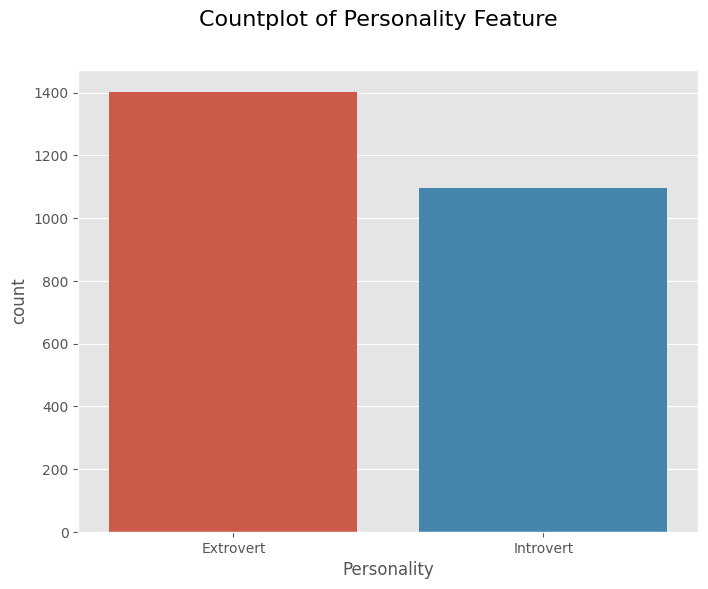

In [17]:
plt.figure(figsize=(8,6))
plt.suptitle('Countplot of Personality Feature', fontsize=16)
sns.countplot(data=df, x='Personality', hue='Personality')

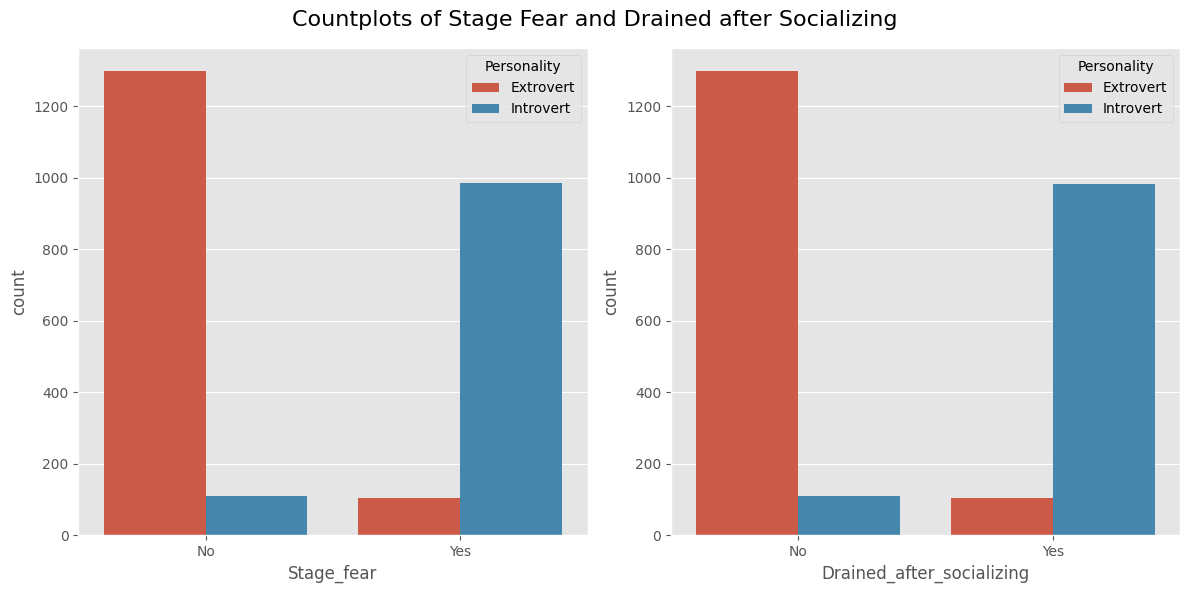

In [20]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
plt.suptitle('Countplots of Stage Fear and Drained after Socializing', fontsize=16)
sns.countplot(data=df, x='Stage_fear', hue='Personality', ax=axes[0])
sns.countplot(data=df, x='Drained_after_socializing', hue='Personality', ax=axes[1])
plt.tight_layout()

#### Boxplots

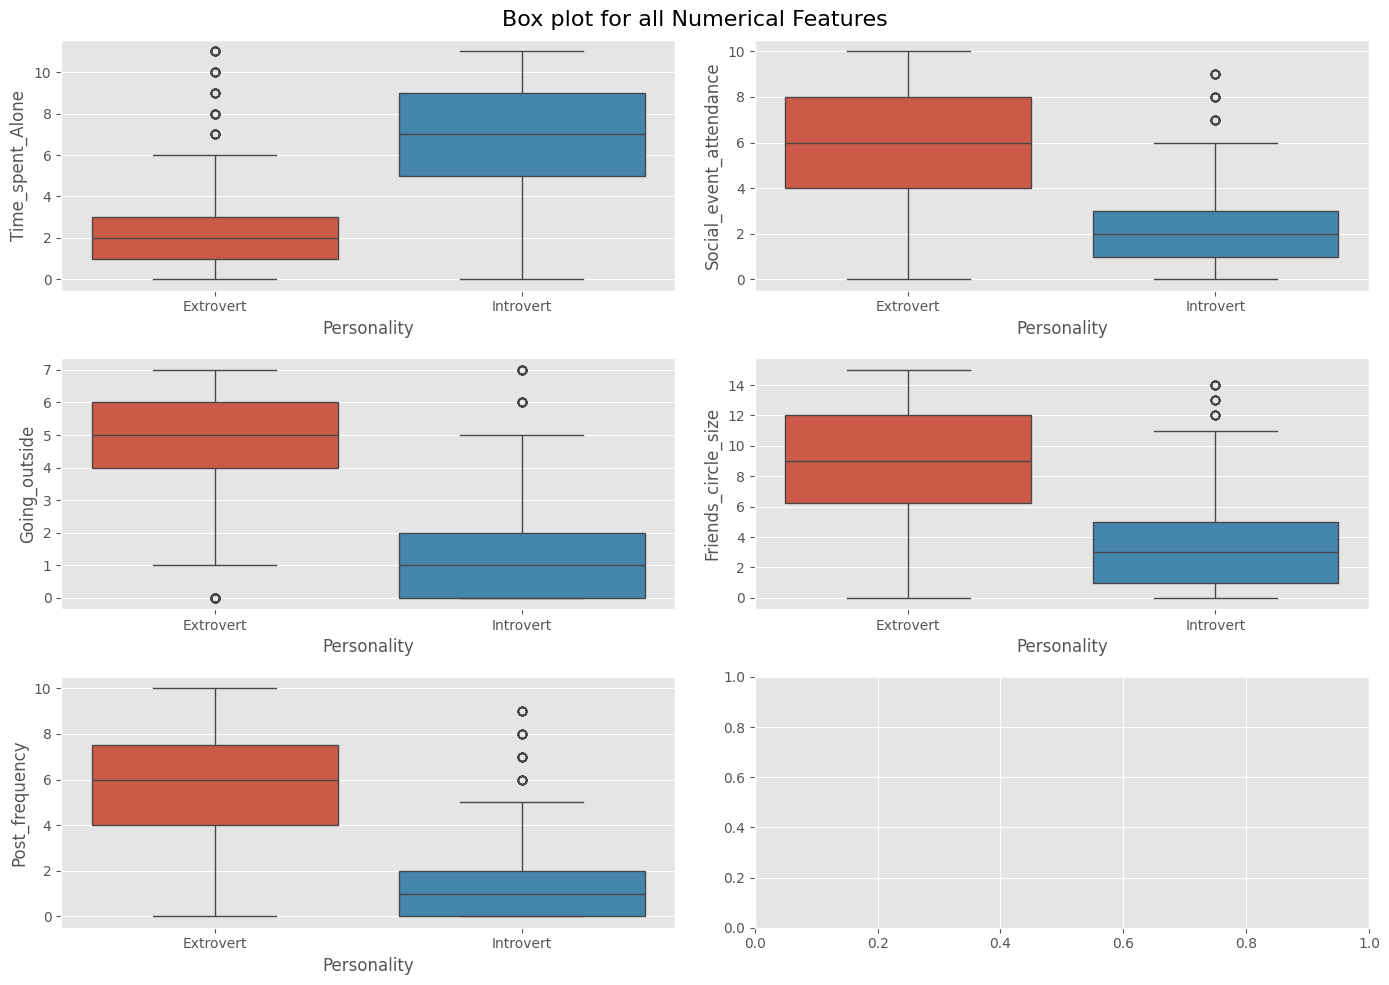

In [24]:
fig, axes = plt.subplots(3,2, figsize=(14,10))
plt.suptitle('Box plot for all Numerical Features', fontsize=16)
sns.boxplot(data=df, x='Personality', y='Time_spent_Alone', hue='Personality', ax=axes[0,0])
sns.boxplot(data=df, x='Personality', y='Social_event_attendance', hue='Personality', ax=axes[0,1])
sns.boxplot(data=df, x='Personality', y='Going_outside', hue='Personality', ax=axes[1,0])
sns.boxplot(data=df, x='Personality', y='Friends_circle_size', hue='Personality', ax=axes[1,1])
sns.boxplot(data=df, x='Personality', y='Post_frequency', hue='Personality', ax=axes[2,0])
plt.tight_layout()

#### Pie Charts

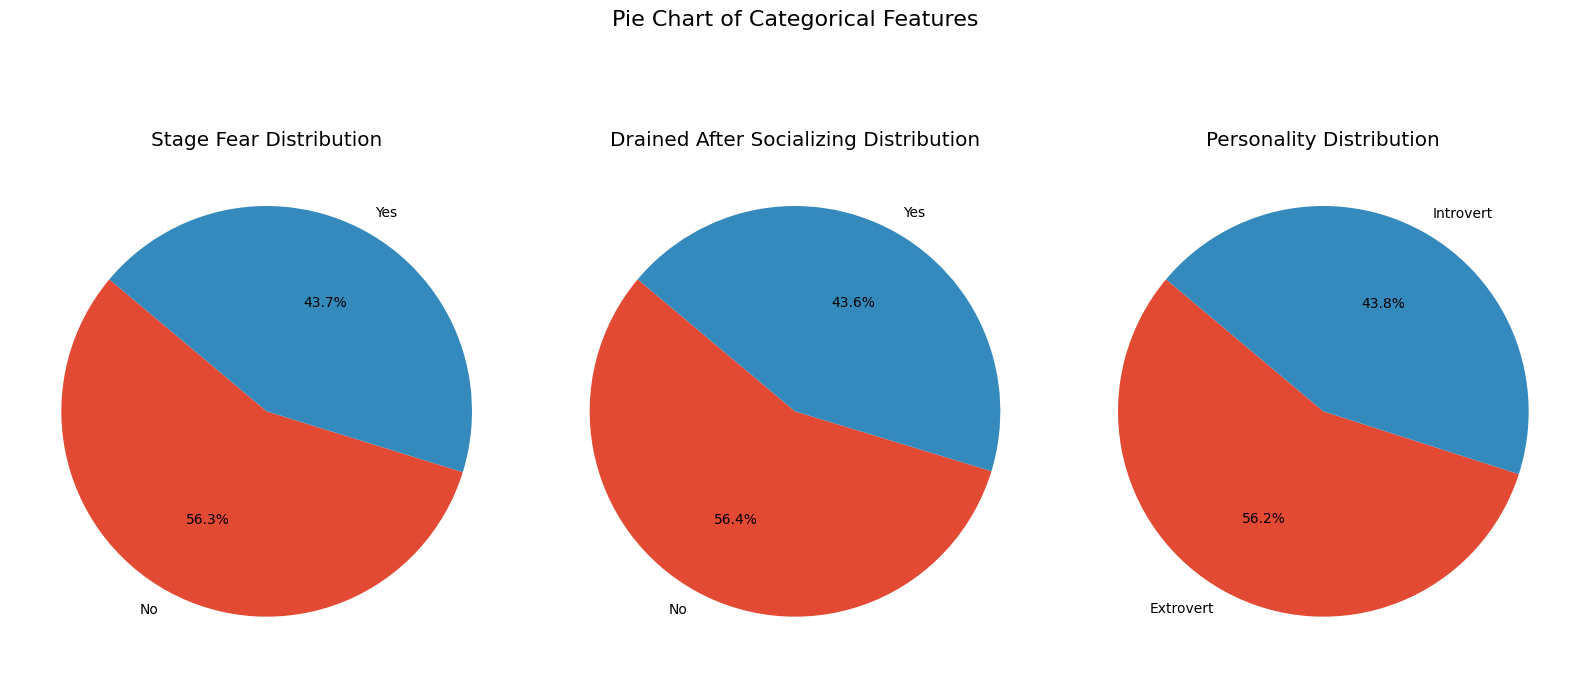

In [13]:
plt.figure(figsize=(16, 8))
plt.suptitle('Pie Chart of Categorical Features', fontsize=16)

plt.subplot(1,3,1)
plt.pie(df['Stage_fear'].value_counts(), labels=df['Stage_fear'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Stage Fear Distribution')

plt.subplot(1,3,2)
plt.pie(df['Drained_after_socializing'].value_counts(), labels=df['Drained_after_socializing'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Drained After Socializing Distribution')

plt.subplot(1,3,3)
plt.pie(df['Personality'].value_counts(), labels=df['Personality'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Personality Distribution')

plt.tight_layout()

#### Histogram

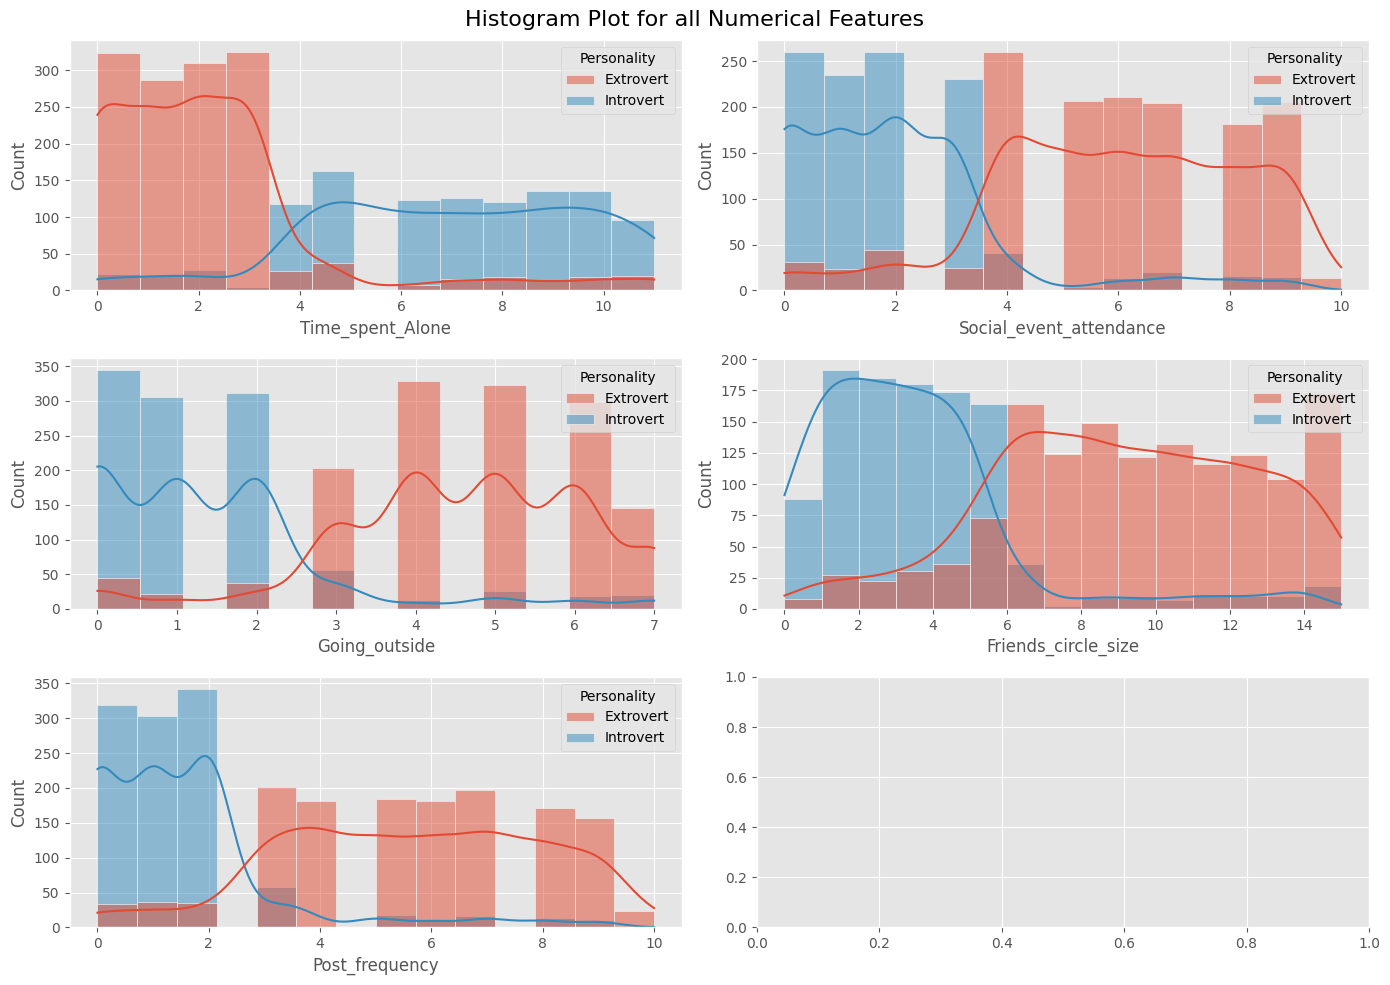

In [16]:
fig, axes = plt.subplots(3,2, figsize=(14,10))
plt.suptitle('Histogram Plot for all Numerical Features', fontsize=16)
sns.histplot(data=df, x='Time_spent_Alone', hue='Personality', ax=axes[0,0], kde=True)
sns.histplot(data=df, x='Social_event_attendance', hue='Personality', ax=axes[0,1], kde=True)
sns.histplot(data=df, x='Going_outside', hue='Personality', ax=axes[1,0], kde=True)
sns.histplot(data=df, x='Friends_circle_size', hue='Personality', ax=axes[1,1], kde=True)
sns.histplot(data=df, x='Post_frequency', hue='Personality', ax=axes[2,0], kde=True)
plt.tight_layout()

#### Violinplot

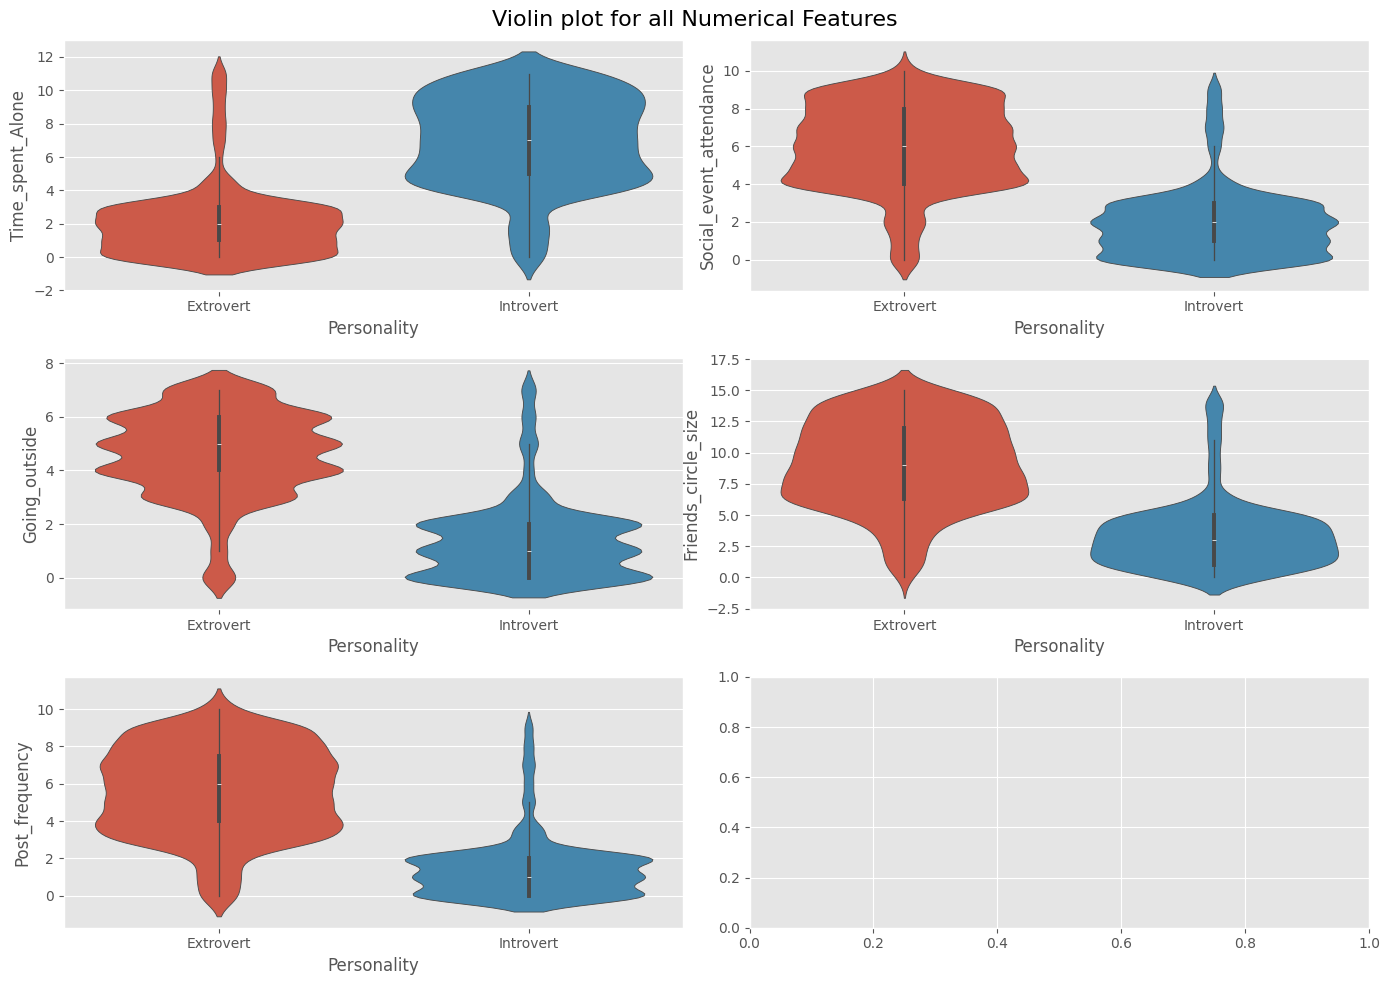

In [17]:
fig, axes = plt.subplots(3,2, figsize=(14,10))
plt.suptitle('Violin plot for all Numerical Features', fontsize=16)
sns.violinplot(data=df, x='Personality', y='Time_spent_Alone', hue='Personality', ax=axes[0,0])
sns.violinplot(data=df, x='Personality', y='Social_event_attendance', hue='Personality', ax=axes[0,1])
sns.violinplot(data=df, x='Personality', y='Going_outside', hue='Personality', ax=axes[1,0])
sns.violinplot(data=df, x='Personality', y='Friends_circle_size', hue='Personality', ax=axes[1,1])
sns.violinplot(data=df, x='Personality', y='Post_frequency', hue='Personality', ax=axes[2,0])
plt.tight_layout()

### Data Augmentation (To Handle Class Imbalance)

After removing 402 duplicate rows, the dataset showed a **class imbalance** between the target labels — with more instances of *Extroverts* than *Introverts*. An imbalanced dataset can lead to biased machine learning models.

#### 📊 Class Distribution Before Augmentation (Post Duplicates Removal)

| Personality | Count |
|-------------|-------|
| Extrovert   | 1403  |
| Introvert   | 1095  |

To address this issue, **data augmentation** was applied using a custom script generated with the help of **Gemini (LLM)**. The script created synthetic samples for the minority class (*Introverts*) by mimicking patterns found in the existing data — ensuring realistic, diverse data points.

Data Augmentation Script Path: ```notebook\data\data_augmentation.py```

#### ✅ Class Distribution After Augmentation

| Personality | Count |
|-------------|-------|
| Extrovert   | 1403  |
| Introvert   | 1403  |

With this, the dataset is now **balanced**, making it more suitable for training classification models without introducing label bias.


In [13]:
df_new = pd.read_csv('data/augmented_dataset.csv')
df_new = df_new.drop_duplicates()
df_new['Personality'].value_counts()

Personality
Extrovert    1403
Introvert    1403
Name: count, dtype: int64

In [14]:
df_new.duplicated().sum()

np.int64(0)

In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2806 non-null   float64
 1   Stage_fear                 2806 non-null   object 
 2   Social_event_attendance    2806 non-null   float64
 3   Going_outside              2806 non-null   float64
 4   Drained_after_socializing  2806 non-null   object 
 5   Friends_circle_size        2806 non-null   float64
 6   Post_frequency             2806 non-null   float64
 7   Personality                2806 non-null   object 
dtypes: float64(5), object(3)
memory usage: 175.5+ KB


### Feature Engineering (Data Transformation/Encoding)

In [16]:
print(f"Number of categorical features: {num_categorical}")
print(f"Features: {df_new.select_dtypes(include=['object']).columns.tolist()}")

Number of categorical features: 3
Features: ['Stage_fear', 'Drained_after_socializing', 'Personality']


In [17]:
categorical_features = df_new.select_dtypes(include=['object']).columns.tolist()

for feature in categorical_features:
    print(f"Feature '{feature}' : {len(df_new[feature].unique())} unique values")
    print('\n')

Feature 'Stage_fear' : 2 unique values


Feature 'Drained_after_socializing' : 2 unique values


Feature 'Personality' : 2 unique values




In [18]:
# Using Label Encoder for 'Stage_fear', 'Drained_after_socializing' and 'Personality'
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_new['Stage_fear'] = le.fit_transform(df_new['Stage_fear'])
df_new['Drained_after_socializing'] = le.fit_transform(df_new['Drained_after_socializing'])
df_new['Personality'] = le.fit_transform(df_new['Personality'])

df_new.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,9.0,1,1.0,2.0,1,5.0,2.0,1
3,0.0,0,6.0,7.0,0,14.0,8.0,0
4,3.0,0,9.0,4.0,0,8.0,5.0,0


In [20]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


**Features Value after Encoding:**
- Stage Fear: {'Yes':1, 'No':0}
- Drained after Socializing: {'Yes':1 , 'No':0}
- Personality: {'Introvert':1 , 'Extrovert':0}

In [19]:
# Save cleaned and encoded daatframe to a new CSV file
df_new.to_csv('data/clean_encoded_data.csv', index=False)